# Analysis of scRNA-seq data

In [21]:
import scanpy as sc
import anndata as ad
import numpy as np

In [17]:
adata = sc.read_h5ad(
    '../processed/scRNAseq_featureCounts_NumReads.h5ad'
)
adata

AnnData object with n_obs × n_vars = 348 × 24421
    obs: 'sample_description', 'sample_genotype', 'sample_treatment', 'sample_sex', 'sample_litter', 'sample_mouseID'
    var: 'Length'

In [27]:
adata.obs['nCount_RNA'] = np.array(adata.X.sum(axis = 1)).flatten()
adata.obs['nFeature_RNA'] = np.array((adata.X > 0).sum(axis = 1)).flatten()
adata.obs

,sample_description,sample_genotype,sample_treatment,sample_sex,sample_litter,sample_mouseID,nCount_RNA,nFeature_RNA
sample_id,,,,,,,,
162194,plate 1 control (200 unlabeled cells),mix,prep 1,m,G1/55 A,GNF1/480,467725.0,13668
162195,1 b1,wt,prep 1,m,G1/55 A,GNF1/480,26336.0,2660
162196,1 c1,wt,prep 1,m,G1/55 A,GNF1/480,36416.0,2728
162197,1 d1,wt,prep 1,m,G1/55 A,GNF1/480,19941.0,2738
162198,1 e1,wt,prep 1,m,G1/55 A,GNF1/480,81482.0,5107
...,...,...,...,...,...,...,...,...
162561,4 d11,wt,prep 2,f,G1/59 B,GN21/475,547198.0,5057
162562,4 e11,wt,prep 2,f,G1/59 B,GN21/475,356940.0,4488
162563,4 f11,wt,prep 2,f,G1/59 B,GN21/475,427530.0,5137


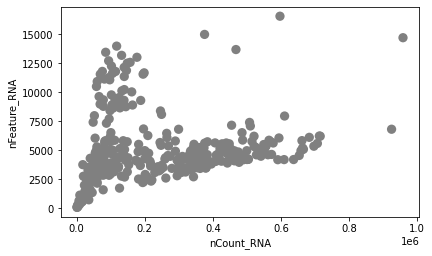

In [32]:
ax = sc.pl.scatter(
    adata, 
    'nCount_RNA', 
    'nFeature_RNA',
    show = False
)

--2022-01-10 15:13:47--  https://ftp.ebi.ac.uk/pub/databases/gencode/Gencode_mouse/release_M28/gencode.vM28.annotation.gtf.gz
Resolving ftp.ebi.ac.uk (ftp.ebi.ac.uk)... 193.62.193.138
Connecting to ftp.ebi.ac.uk (ftp.ebi.ac.uk)|193.62.193.138|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28349951 (27M) [application/octet-stream]
Saving to: ‘gencode.vM28.annotation.gtf.gz’

100%[======================================>] 28,349,951  4.01MB/s   in 8.9s   

2022-01-10 15:13:56 (3.05 MB/s) - ‘gencode.vM28.annotation.gtf.gz’ saved [28349951/28349951]



In [53]:
pd.read_csv('gencode.vM28.annotation.gtf.gz', comment = '#', sep = '\t', header = None)

,0,1,2,3,4,5,6,7,8
0,chr1,HAVANA,gene,3143476,3144545,.,+,.,"gene_id ""ENSMUSG00000102693.2""; gene_type ""TEC..."
1,chr1,HAVANA,transcript,3143476,3144545,.,+,.,"gene_id ""ENSMUSG00000102693.2""; transcript_id ..."
2,chr1,HAVANA,exon,3143476,3144545,.,+,.,"gene_id ""ENSMUSG00000102693.2""; transcript_id ..."
3,chr1,ENSEMBL,gene,3172239,3172348,.,+,.,"gene_id ""ENSMUSG00000064842.3""; gene_type ""snR..."
4,chr1,ENSEMBL,transcript,3172239,3172348,.,+,.,"gene_id ""ENSMUSG00000064842.3""; transcript_id ..."
...,...,...,...,...,...,...,...,...,...
1869204,chrM,ENSEMBL,transcript,15289,15355,.,+,.,"gene_id ""ENSMUSG00000064371.1""; transcript_id ..."
1869205,chrM,ENSEMBL,exon,15289,15355,.,+,.,"gene_id ""ENSMUSG00000064371.1""; transcript_id ..."
1869206,chrM,ENSEMBL,gene,15356,15422,.,-,.,"gene_id ""ENSMUSG00000064372.1""; gene_type ""Mt_..."
1869207,chrM,ENSEMBL,transcript,15356,15422,.,-,.,"gene_id ""ENSMUSG00000064372.1""; transcript_id ..."
